In [1]:
from billiard import *

In [2]:
QC = Billiard(shape='quartercircle', a1=1, a2=1, M0=400, V0=5e4)
QC.compute_everything()

V-matrix Imported


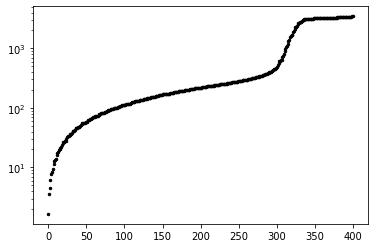

In [5]:
QC.plot_e_energies(log=True)

In [6]:
def nE(Emax, E_list):
    # Returns count of entries in E_list smaller or equal to Emax
    count = 0
    for E in E_list:
        if E <= Emax:
            count += 1

    return count

def diff(E_list):
    return [(E_list[n+1] - E_list[n]) for n in range(0, len(E_list)-1)]

evals = QC.e_eigenvals
#sorted(evals)

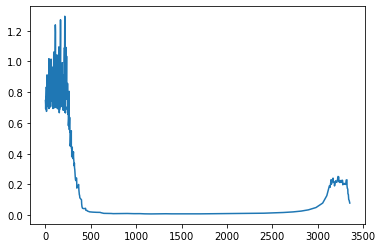

In [7]:
# want to estimate spectral density... calculate average spacing between 2 nearest neighbours on either side -> space between 5 consecutive energy levels... take this as rho

# spectral density is how many energy levels appear per unit of energy
davg = 10
rho = [(davg-1)/(evals[i+davg] - evals[i]) for i in range(len(evals)-davg) ]
plt.plot(evals[:400-davg], rho)
#nE(rho)
#plt.plot(diff([nE(rho[i],rho) for i, _ in enumerate(evals[:400-davg])]))
#diff([nE(rho[i], rho) for i, E in enumerate(evals[:100])])
#plt.plot([sum([rho[0]]) for E in evals])

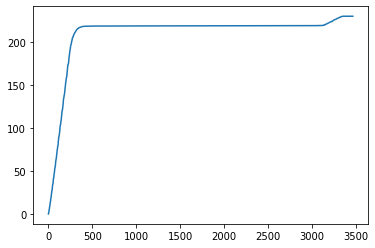

In [8]:
e_unfolded = [sum(rho[0:i]) for i, E in enumerate(evals)]
plt.plot(evals, e_unfolded)
#plt.plot(range(3500),[1/(4*np.pi)* (QC.A*E - QC.L*np.sqrt(E)) for E in range(3500)])
#plt.xlim([0,400])
#plt.ylim([0,500])

(array([2.40196325, 3.04248679, 3.76307577, 3.20261767, 1.52124339,
        1.04085074, 0.48039265, 0.08006544, 0.16013088, 0.24019633]),
 array([0.66632917, 0.7290919 , 0.79185463, 0.85461736, 0.91738009,
        0.98014282, 1.04290555, 1.10566827, 1.168431  , 1.23119373,
        1.29395646]),
 <BarContainer object of 10 artists>)

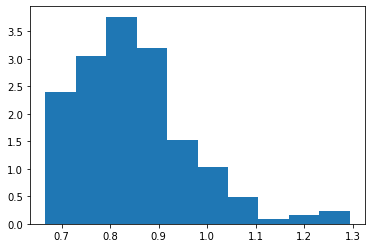

In [9]:
plt.hist(sorted(diff(e_unfolded[:200])), density=True)

## OLD AND USELESS

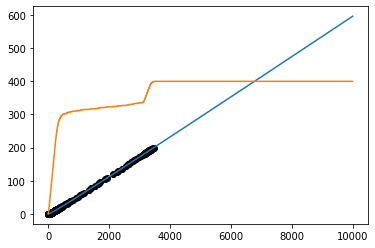

In [700]:

E_tilde = [weyl(E, A, L) for E in e_eigenvals]
plt.scatter(e_eigenvals, E_tilde, c="black")
plt.plot(range(10000), [weyl(i,A,L) for i in range(10000)])
plt.plot(range(10000), [nE(E, e_eigenvals) for E in range(10000)])
#plt.xlim([0,300])
#plt.ylim([-1,15])

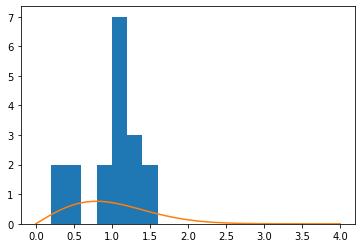

In [697]:
sn_tilde = [E_tilde[n+1] - E_tilde[n] for n in range(0, len(E_tilde)-1)]
sn = [(e_eigenvals[n+1] - e_eigenvals[n]) for n in range(0, len(e_eigenvals)-1)]

eigenvals = np.sort(eigenvals)
Ps = [min([eigenvals[i+1]- eigenvals[i], eigenvals[i] - eigenvals[i-1]]) for i in range(1,len(eigenvals) -1)]

mean = sum(Ps)/len(Ps)
plt.hist(np.sort(Ps), bins=[0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8])

Pgoe = lambda s: np.pi/2 * s * np.exp(-np.pi * s**2 / 4)

S = np.linspace(0, 4, 100)

plt.plot(S, [Pgoe(s) for s in S])